In [1]:
from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

# Cars

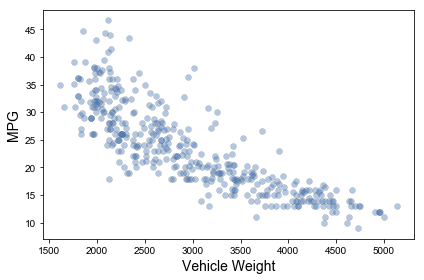

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4',
                edgecolor=GREY, lw=.3)

plt.xlabel("Vehicle Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14)
plt.tight_layout()
plt.savefig("/tmp/cars-wgt-vs-mpg.svg", bbox_inches=0, pad_inches=0)

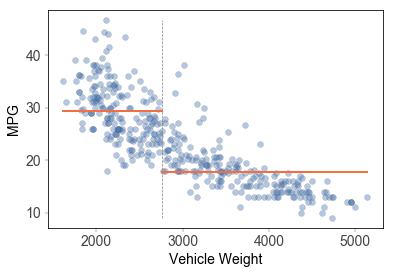

In [3]:
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

fig = plt.figure()
ax = fig.gca()

max_depth = 1
rtreeviz_univar(ax,
                    X.WGT, y,
                     max_depth=max_depth,
                     feature_name='Vehicle Weight',
                     target_name='MPG',
                     fontsize=14,
                   show={'splits'})
plt.savefig(f"/tmp/cars-dectree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)

In [4]:
def get_splits(x_train,y_train,max_depth):
    t = tree.DecisionTreeRegressor(max_depth=max_depth)
    t.fit(x_train.reshape(-1,1), y_train)

    shadow_tree = ShadowDecTree(t, x_train.reshape(-1,1), y_train, feature_names=['foo'])
    splits = []
    for node in shadow_tree.internal:
        splits.append(node.split())
    preds = []
    for node in shadow_tree.leaves:
        preds.append(node.prediction())
    return splits, preds

splits, preds = get_splits(X.WGT.values, y, 1)
print(splits, '\n', preds)
splits, preds = get_splits(X.WGT.values, y, 2)
print(splits, '\n', preds)

[2764.5] 
 [29.41989521989529, 17.769154278606962]
[2217.0, 3657.5, 2764.5] 
 [32.61382956382979, 26.32474235051546, 20.485185268518514, 14.61505377419355]


## Animate cars

In [ ]:
df_cars = pd.read_csv("data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

max_depth = 4
figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')
t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=max_depth,
                      features=[2,1],
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='MPG',
                      fontsize=14)
plt.savefig(f"/tmp/rtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

for ii in xrange(0,360,1):
    ax.view_init(elev=10., azim=ii)
    savefig("movie%d.png" % ii)

# Wine

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


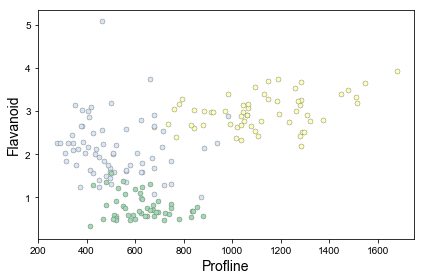

In [5]:
from sklearn.datasets import load_wine

fig = plt.figure()
ax = fig.gca()

wine = load_wine()

class_values = [0,1,2]

print(wine.feature_names)
X = wine.data[:,[12,6]]
y = wine.target
X_hist = [X[y == cl] for cl in class_values]

color_values = color_blind_friendly_colors[3]
colors = {v: color_values[i] for i, v in enumerate(class_values)}

for i, h in enumerate(X_hist):
    ax.scatter(h[:,0], h[:,1], alpha=1, marker='o', s=25, c=colors[i],
               edgecolors=GREY, lw=.3)

#plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4', edgecolor=GREY, lw=.3)

plt.xlabel("Profline", fontsize=14)
plt.ylabel("Flavanoid", fontsize=14)
plt.tight_layout()
plt.savefig("/tmp/wine-prol-flav.svg", bbox_inches=0, pad_inches=0)

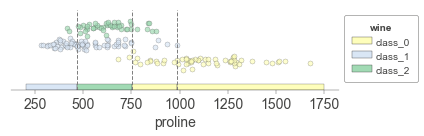

In [11]:
from dtreeviz.trees import *

max_depth = 2

features = [12]
feature_names=['proline']
figsize = (6, 2)
fig, ax = plt.subplots(1, 1, figsize=figsize)

x_train = wine.data[:, features[0]]
y_train = wine.target
ctreeviz_univar(ax, x_train, y_train, max_depth=max_depth, feature_name=feature_names[0],
                class_names=list(wine.target_names), gtype='strip', target_name='wine',
               show={'splits','legend'})
filename = f"/tmp/wine-{feature_names[0]}-featspace-depth-{max_depth}.svg"
plt.tight_layout()
plt.savefig(filename, bbox_inches=0, pad_inches=0)

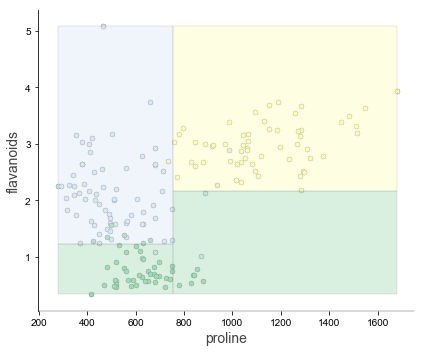

In [14]:
max_depth = 2

features = [12,6]
feature_names=['proline','flavanoids']

figsize = (6, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

X_train = wine.data
y_train = wine.target
ctreeviz_bivar(ax, X_train, y_train, max_depth=max_depth, feature_names=feature_names,
               features=features,
                class_names=list(wine.target_names), target_name='wine',
               show={'splits'})
filename = f"/tmp/wine-{','.join(feature_names)}-featspace-depth-{max_depth}.svg"
plt.tight_layout()
plt.savefig(filename, bbox_inches=0, pad_inches=0)